## 사전 훈련 모델

#### 치매 환자의 뇌인지 일반인의 뇌인지 예측하기

In [1]:
# !git clone https://github.com/taehojo/data-ch20.git

'data-ch20'에 복제합니다...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
오브젝트를 받는 중: 100% (265/265), 1.86 MiB | 27.23 MiB/s, 완료.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True, 
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   # rotation_range=5,
                                   # shear_range = 0.7,
                                   # zoom_rainge = [0.9, 2.2]
                                   # vertical_filp = True, 
                                   # fill_mode = 'nearest'
                                  )

# 학습 데이터에 대하여 이미지 증강을 하여 사용
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size = (150,150),
    batch_size = 5,
    class_mode= 'binary'
)

# 테스트셋은 이미지 증강을 사용하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/train',
    target_size = (150,150),
    batch_size = 5,
    class_mode= 'binary'
)

# CNN 모델 구축
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0002), metrics = ['acc'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience =5)

Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data = test_generator,
                    validation_steps = 10, 
                    callbacks=[early_stopping_callback])

Epoch 1/100
 1/32 ━━━━━━━━━━━━━━━━━━━━ 23s 744ms/step - acc: 0.6000 - loss: 0.6864

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.5522 - loss: 0.6897 - val_acc: 0.5400 - val_loss: 0.6903
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.4966 - loss: 0.6977 - val_acc: 0.5000 - val_loss: 0.6858
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.5856 - loss: 0.6791 - val_acc: 0.5600 - val_loss: 0.6758
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.5124 - loss: 0.6929 - val_acc: 0.5000 - val_loss: 0.6708
Epoch 5/100
 1/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - acc: 0.6000 - loss: 0.7068

2024-07-14 17:47:29.960713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.5644 - loss: 0.6749 - val_acc: 0.4600 - val_loss: 0.6611
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.5767 - loss: 0.6801 - val_acc: 0.7600 - val_loss: 0.5954
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.6752 - loss: 0.6389 - val_acc: 0.7800 - val_loss: 0.5684
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.7443 - loss: 0.5895 - val_acc: 1.0000 - val_loss: 0.4403
Epoch 9/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.7667 - loss: 0.4869 

2024-07-14 17:47:34.532587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.7530 - loss: 0.5438 - val_acc: 0.8800 - val_loss: 0.3895
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.7456 - loss: 0.5261 - val_acc: 0.8200 - val_loss: 0.3949
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.8444 - loss: 0.4220 - val_acc: 0.9000 - val_loss: 0.3327
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.8713 - loss: 0.3598 - val_acc: 0.9000 - val_loss: 0.2785
Epoch 13/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.8556 - loss: 0.3517 

2024-07-14 17:47:39.125387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.8619 - loss: 0.3216 - val_acc: 0.9200 - val_loss: 0.3240
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.8672 - loss: 0.3651 - val_acc: 1.0000 - val_loss: 0.1764
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9109 - loss: 0.2655 - val_acc: 0.9800 - val_loss: 0.1542
Epoch 16/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9183 - loss: 0.2252 - val_acc: 1.0000 - val_loss: 0.1610
Epoch 17/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.8222 - loss: 0.2794 

2024-07-14 17:47:43.699829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9104 - loss: 0.2057 - val_acc: 0.9800 - val_loss: 0.1129
Epoch 18/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9392 - loss: 0.1745 - val_acc: 0.9400 - val_loss: 0.1318
Epoch 19/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9445 - loss: 0.2044 - val_acc: 0.9800 - val_loss: 0.1425
Epoch 20/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9325 - loss: 0.1642 - val_acc: 1.0000 - val_loss: 0.0542
Epoch 21/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 1.0000 - loss: 0.0895 

2024-07-14 17:47:48.296836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9428 - loss: 0.1781 - val_acc: 0.9200 - val_loss: 0.1950
Epoch 22/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9572 - loss: 0.1870 - val_acc: 0.9600 - val_loss: 0.0978
Epoch 23/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9672 - loss: 0.1357 - val_acc: 0.9800 - val_loss: 0.1222
Epoch 24/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9729 - loss: 0.1345 - val_acc: 1.0000 - val_loss: 0.0290
Epoch 25/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.8778 - loss: 0.3702 

2024-07-14 17:47:52.887001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9334 - loss: 0.1915 - val_acc: 1.0000 - val_loss: 0.0441
Epoch 26/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9541 - loss: 0.1494 - val_acc: 0.9800 - val_loss: 0.0599
Epoch 27/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.9516 - loss: 0.1218 - val_acc: 0.9800 - val_loss: 0.0938
Epoch 28/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9521 - loss: 0.1264 - val_acc: 1.0000 - val_loss: 0.0390
Epoch 29/100
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.9778 - loss: 0.0777 

2024-07-14 17:47:57.474603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9661 - loss: 0.1293 - val_acc: 0.9800 - val_loss: 0.0932


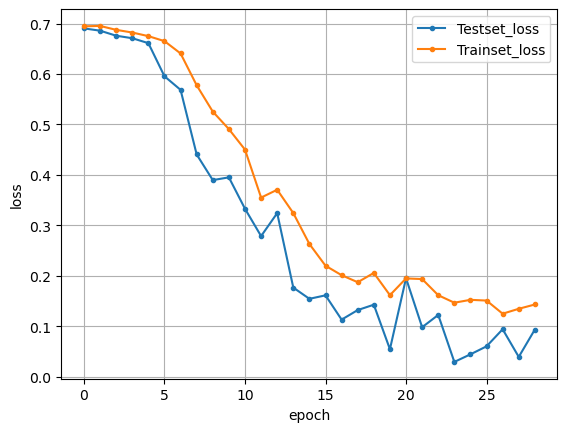

In [9]:
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker=".", label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


## 전이학습 (VGG16)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D
from tensorflow.keras import models, layers, optimizers, metrics 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True, 
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1
                                  )

# 학습 데이터에 대하여 이미지 증강을 하여 사용
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size = (150,150),
    batch_size = 5,
    class_mode= 'binary'
)

# 테스트셋은 이미지 증강을 사용하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20/train',
    target_size = (150,150),
    batch_size = 5,
    class_mode= 'binary'
)

# VGG 모델 불러오기
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False

# 분류기 모델 설정
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

# 모델 실행 옵션 설정
finetune_model.compile(loss='binary_crossentropy', optimizer = optimizers.Adam(learning_rate=0.0002), metrics = ['acc'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience =5)

Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
history = finetune_model.fit(
    train_generator,
    epochs = 20, 
    validation_data=test_generator,
    validation_steps = 10,
    callbacks=[early_stopping_callback]
)

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - acc: 0.5949 - loss: 0.8298 - val_acc: 0.8600 - val_loss: 0.4794
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - acc: 0.8022 - loss: 0.5249 - val_acc: 0.7200 - val_loss: 0.4830
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - acc: 0.7811 - loss: 0.4592 - val_acc: 0.8400 - val_loss: 0.3452
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - acc: 0.8427 - loss: 0.4245 - val_acc: 0.5000 - val_loss: 0.6189
Epoch 5/20


2024-07-14 18:14:22.226307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 298ms/step - acc: 0.9065 - loss: 0.3163 - val_acc: 0.9200 - val_loss: 0.2822
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - acc: 0.9265 - loss: 0.2756 - val_acc: 0.9400 - val_loss: 0.2357
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - acc: 0.8930 - loss: 0.3186 - val_acc: 0.9800 - val_loss: 0.1976
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - acc: 0.9149 - loss: 0.2215 - val_acc: 1.0000 - val_loss: 0.1395
Epoch 9/20


2024-07-14 18:15:00.714438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - acc: 0.9646 - loss: 0.2200 - val_acc: 0.9400 - val_loss: 0.2085
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - acc: 0.9507 - loss: 0.2158 - val_acc: 0.9200 - val_loss: 0.2094
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step - acc: 0.9647 - loss: 0.1580 - val_acc: 1.0000 - val_loss: 0.1169
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - acc: 0.9373 - loss: 0.1903 - val_acc: 1.0000 - val_loss: 0.1714
Epoch 13/20


2024-07-14 18:15:46.045262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - acc: 0.9175 - loss: 0.2167 - val_acc: 0.9800 - val_loss: 0.1559
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - acc: 0.9244 - loss: 0.2072 - val_acc: 0.9800 - val_loss: 0.1480
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - acc: 0.9467 - loss: 0.2193 - val_acc: 1.0000 - val_loss: 0.0920
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - acc: 0.9416 - loss: 0.1724 - val_acc: 1.0000 - val_loss: 0.0710
Epoch 17/20


2024-07-14 18:16:28.969162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - acc: 0.9672 - loss: 0.1393 - val_acc: 1.0000 - val_loss: 0.0749
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - acc: 0.9080 - loss: 0.1936 - val_acc: 0.9600 - val_loss: 0.1122
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - acc: 0.9034 - loss: 0.1997 - val_acc: 0.9600 - val_loss: 0.1116
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - acc: 0.9689 - loss: 0.1215 - val_acc: 1.0000 - val_loss: 0.0508


2024-07-14 18:17:11.904089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


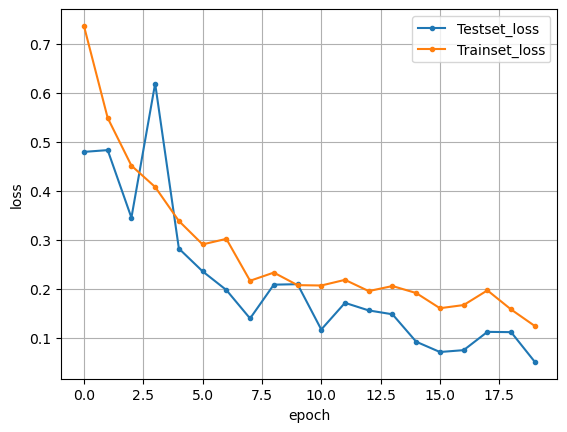

In [25]:
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker=".", label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
